0.5552632504857363 0.011987415758458997


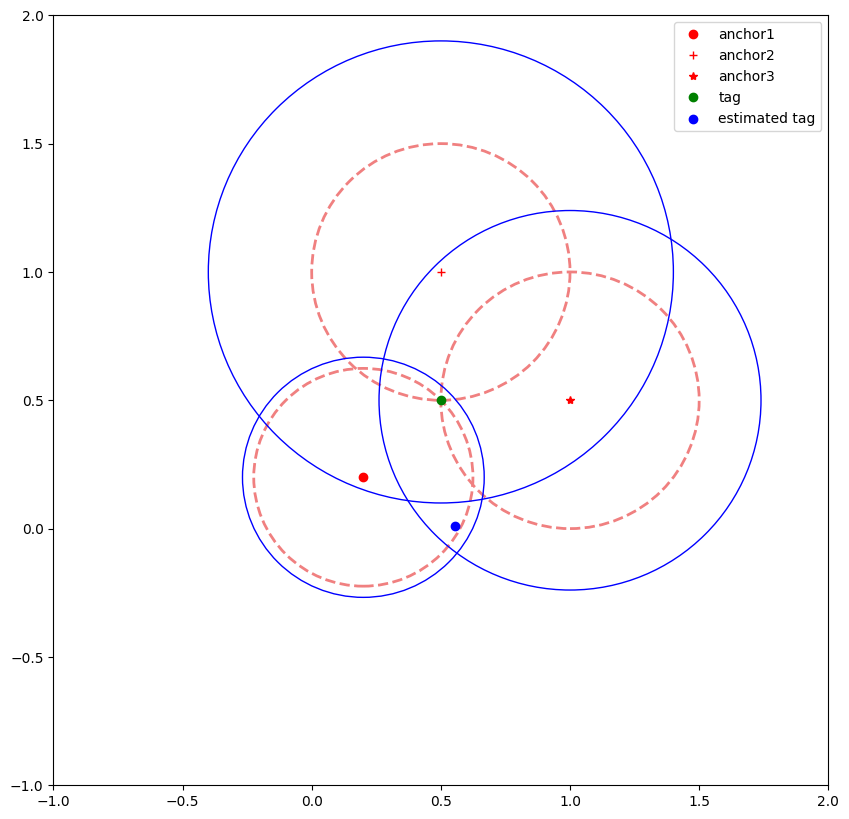

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import minimize

# 交点 (tag point)
tag = (0.5, 0.5)  # 任意の交点

# 円の中心
anchor1 = (0.2, 0.2)
anchor2 = (0.5, 1.0)
anchor3 = (1.0, 0.5)

# 半径を交点との距離に基づいて計算
distance1 = np.sqrt((tag[0] - anchor1[0])**2 + (tag[1] - anchor1[1])**2)
distance2 = np.sqrt((tag[0] - anchor2[0])**2 + (tag[1] - anchor2[1])**2)
distance3 = np.sqrt((tag[0] - anchor3[0])**2 + (tag[1] - anchor3[1])**2)

# 描画
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)


# 点をプロット
ax.plot(anchor1[0], anchor1[1], 'ro', label='anchor1')
ax.plot(anchor2[0], anchor2[1], 'r+', label='anchor2')
ax.plot(anchor3[0], anchor3[1], 'r*', label='anchor3')
ax.plot(tag[0], tag[1], 'go', label='tag')

# 円をプロット
circle1 = plt.Circle(anchor1, distance1, edgecolor='lightcoral', fill=False, linestyle='dashed', linewidth=2)
circle2 = plt.Circle(anchor2, distance2, edgecolor='lightcoral', fill=False, linestyle='dashed', linewidth=2)
circle3 = plt.Circle(anchor3, distance3, edgecolor='lightcoral', fill=False, linestyle='dashed', linewidth=2)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

# ノイズを追加
d1_noize = distance1 + (np.random.rand()) * 0.5
d2_noize = distance2 + (np.random.rand()) * 0.5
d3_noize = distance3 + (np.random.rand()) * 0.5
circle1_noize = plt.Circle(anchor1, d1_noize, edgecolor='blue', fill=False)
circle2_noize = plt.Circle(anchor2, d2_noize, edgecolor='blue', fill=False)
circle3_noize = plt.Circle(anchor3, d3_noize, edgecolor='blue', fill=False)
ax.add_artist(circle1_noize)
ax.add_artist(circle2_noize)
ax.add_artist(circle3_noize)


# objectx 関数の定義 (x と y の引数)
def object(params):
    x, y = params[0], params[1]
    sigma1 = np.sqrt((x - anchor1[0])**2 + (y - anchor1[1])**2) - d1_noize
    sigma2 = np.sqrt((x - anchor2[0])**2 + (y - anchor2[1])**2) - d2_noize
    sigma3 = np.sqrt((x - anchor3[0])**2 + (y - anchor3[1])**2) - d3_noize
    Exy = sigma1**2 + sigma2**2 + sigma3**2
    return Exy  # エネルギー関数の値


# 最適化関数を使用して最小値を探す
result = minimize(object, tag, method='Nelder-Mead')
print(result.x[0], result.x[1])
ax.scatter(result.x[0], result.x[1], c='blue', label='estimated tag')

ax.legend()
plt.show()


-1.07 -0.06428571428571428


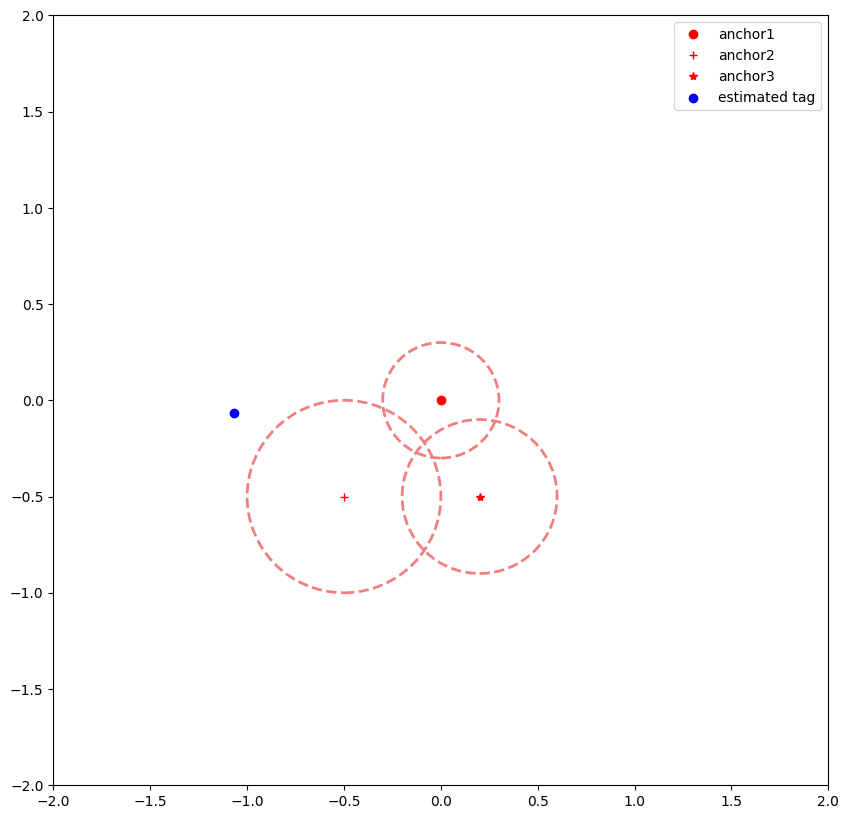

In [248]:
import matplotlib.pyplot as plt

# 円の中心
anchor1 = (0, 0)
anchor2 = (-0.5, -0.5)
anchor3 = (0.2, -0.5)

# 距離が与えられる
distance1 = 0.3
distance2 = 0.5
distance3 = 0.4


# 描画
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# 点をプロット
ax.plot(anchor1[0], anchor1[1], 'ro', label='anchor1')
ax.plot(anchor2[0], anchor2[1], 'r+', label='anchor2')
ax.plot(anchor3[0], anchor3[1], 'r*', label='anchor3')

# 円をプロット
circle1 = plt.Circle(anchor1, distance1, edgecolor='lightcoral', fill=False, linestyle='dashed', linewidth=2)
circle2 = plt.Circle(anchor2, distance2, edgecolor='lightcoral', fill=False, linestyle='dashed', linewidth=2)
circle3 = plt.Circle(anchor3, distance3, edgecolor='lightcoral', fill=False, linestyle='dashed', linewidth=2)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

# analytic solution
def analytic_solution(anchor1, anchor2, anchor3, r1, r2, r3):
    x1, y1 = anchor1
    x2, y2 = anchor2
    x3, y3 = anchor3
    
    # 中心座標
    yt = (x2 - x3) / 2 - (r3**2 - r2**2 + (x2 - x3)**2) / (2 * (x2 - x3))
    xt = (r3**2 - r1**2 + x2**2 + y2**2 - 2 * x1 * ((x2 - x3) / 2 - yt)) / (2 * y2) + y2
    
    return (xt, yt)

# 解を計算
xt, yt = analytic_solution(anchor1, anchor2, anchor3, distance1, distance2, distance3)
print(xt, yt)

# 推定されたtagの位置をプロット
ax.scatter(xt, yt, c='blue', label='estimated tag')

# ラベルや凡例を追加
ax.legend()
plt.show()
